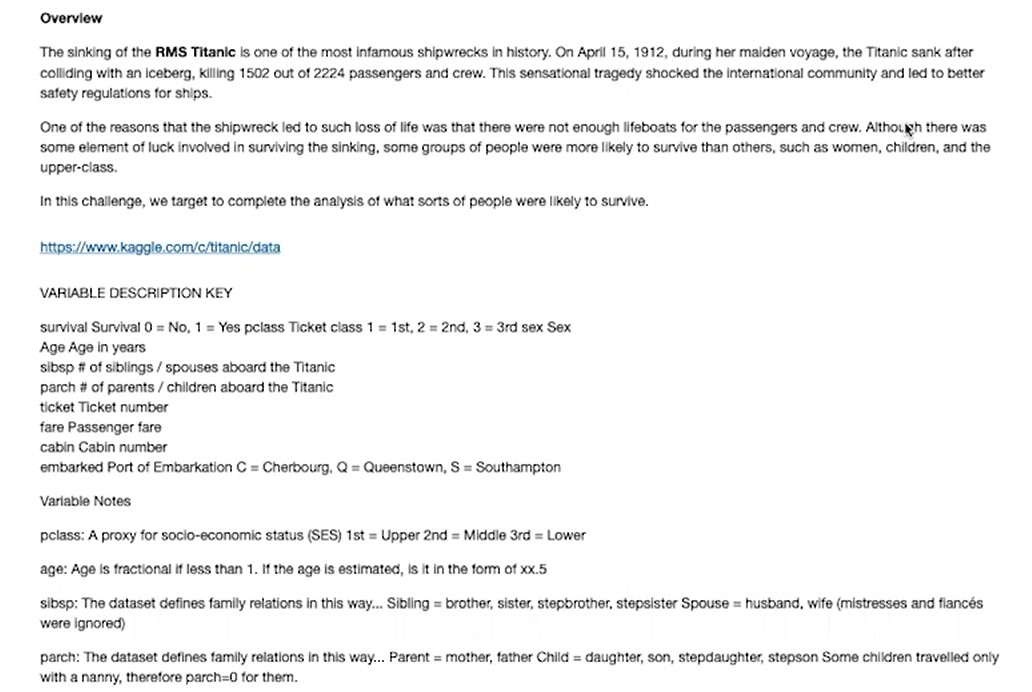

### Importing Libraries

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(12,10)})

import warnings
warnings.filterwarnings('ignore')

In [51]:
import random
random.seed(101)

### Loading the data

In [52]:
data=pd.read_csv('data/train.csv')
# test=pd.read_csv('data/test.csv')

In [53]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
dict_lived={
    0:"Died",
    1:"Survived"
}

dict_sex={
    "male":0,
    "female":1
}
data["Bsex"]=data["Sex"].apply(lambda x:dict_sex[x])

#features
featurs=data[['Pclass','Bsex']].to_numpy()
labels=data['Survived'].to_numpy()

### Splitting the data

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(featurs,labels,test_size=0.30,random_state=0)

### Multilayer Perceptron

#### Activation function and derivation

In [76]:
# Sigmoid
def Sigmoid(x,derivative=False):
    if derivative == True:
        f=1/(1+np.exp(-x)) * (1-1/(1+np.exp(-x)))
    else:
        f=1/(1+np.exp(-x))
        
    return f

#ReLu
def ReLu(x,derivative=False):
    if derivative == True:
        f=np.heaviside(x,1)
    else:
        f=np.maximum(x,0)

    return f

### Train Model

In [77]:
def Train_ANN(x_train,y_train,h1_units=4,h2_units=4,learnning_rate=0.0015):
    random.seed(101)
    
    #hidden_layers 1
    w1=2*np.random.rand(h1_units,x_train.shape[1])
    b1=np.random.rand(h1_units)
    
    #hidden_layer 2
    w2=2*np.random.rand(h2_units,h1_units)
    b2=np.random.rand(h2_units)
    
    #output_layer
    w_out=2*np.random.rand(h2_units)
    b_out=np.random.rand(1)
    
    loss=[]
    vect_y=[]
    
    for i in range(0,x_train.shape[0]):
        x_data=x_train[i]
        
        #2. feed forward
        h1=ReLu(np.dot(w1,x_data)+b1) #hidden Layer 1 output
        h2=ReLu(np.dot(w2,h1)+b2) #hidden Layer 2 output
        y=Sigmoid(np.dot(w_out,h2)+b_out) #output of outer layer
        
        #3. Back propagation
        delta_out=(y-y_train[i])*Sigmoid(y,derivative=True)
        delta_2=delta_out*w_out*ReLu(h2,derivative=True)
        delta_1=np.dot(delta_2,w2)*ReLu(h1,derivative=True)
        
        # gradient Descent
        w_out=w_out-learnning_rate * delta_out * h2 #output layer
        b_out=b_out-learnning_rate * delta_out
        
        #hidden layer 2
        w2=w2-learnning_rate*np.kron(delta_2,h1).reshape(h2_units,h1_units)
        b2=b2-learnning_rate * delta_2
        
        #hidden layer 1
        w1=w1-learnning_rate*np.kron(delta_1,x_data).reshape(h1_units,x_data.shape[0])
        b1=b1-learnning_rate * delta_1
        
        #cost
        loss.append((1/2)*(y-y_train[i])**2)
        vect_y.append(y[0])
    
    batch_loss=[]
    for i in range(0,10):
        loss_avg=0
        for m in range(0,60):
            loss_avg+=vect_y[60*i+m]/60
        batch_loss.append(loss_avg)
        
    plt.figure(figsize=(15,8))
    plt.plot(np.arange(1,len(batch_loss)+1),batch_loss)
    plt.title("Average loss by epoch",fontsize=20)
    plt.xlabel('Epoch',fontsize=16)
    plt.ylabel('Loss',fontsize=16)
    plt.show()
    
    return w1,b1,w2,b2,w_out,b_out,loss


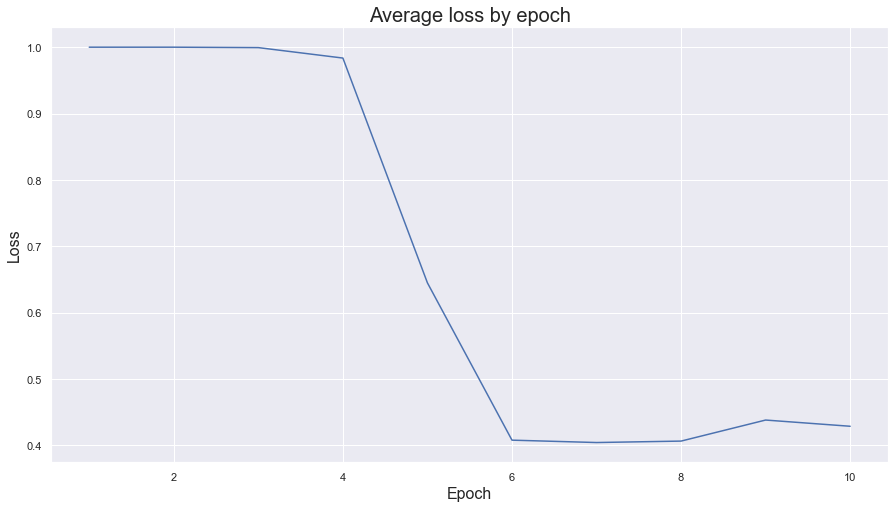

In [78]:
w1,b1,w2,b2,w_out,b_out,loss=Train_ANN(x_train,y_train)

### Testing Module

In [79]:
def Ann_pred(x_test,w1,b1,w2,b2,w_out,b_out):
    pred=[]
    for i in range(0,x_test.shape[0]):
        x=x_test[i]
        
        #2. feed forward
        z1=ReLu(np.dot(w1,x)+b1) #hidden Layer 1 output
        z2=ReLu(np.dot(w2,z1)+b2) #hidden Layer 2 output
        y=Sigmoid(np.dot(w_out,z2)+b_out) #output of outer layer
        
        pred.append(np.heaviside(y-0.5,1)[0])
        
    return np.array(pred)

In [80]:
predictions=Ann_pred(x_test,w1,b1,w2,b2,w_out,b_out)

In [81]:
predictions

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 0.

### Model Evaluation

In [82]:
from sklearn.metrics import accuracy_score,confusion_matrix

cm=confusion_matrix(y_test,predictions)

df_cm=pd.DataFrame(cm,index=[dict_lived[i] for i in range(0,2)],
                  columns=[dict_lived[i] for i in range(0,2)])

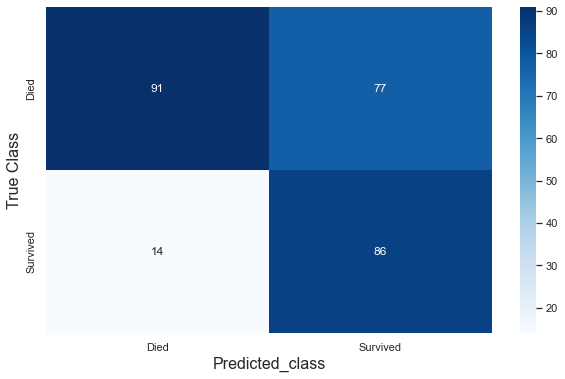

In [83]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cm,annot=True,cmap=plt.cm.Blues,fmt='g')
plt.xlabel('Predicted_class',fontsize=16)
plt.ylabel('True Class',fontsize=16)
plt.show()

In [84]:
accuracy_score(y_test,predictions)

0.6604477611940298